##### Gradient-boosted Decision Trees

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

##### Gradient boosted decision trees on complex binary non-linearly seperable dataset

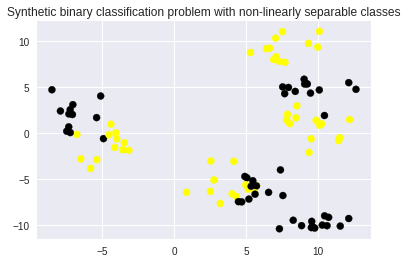

In [9]:
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Synthetic binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, 
            marker='o', s=50, cmap=cmap_bold)
plt.show()

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)


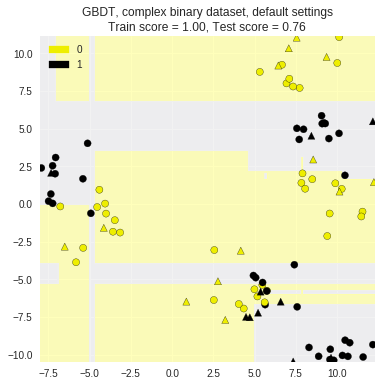

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(1,1,figsize=(6,6))
clf = GradientBoostingClassifier()
print clf
clf.fit(X_train,y_train)
title = 'GBDT, complex binary dataset, default settings'
targets = np.unique(y_D2)
plot_class_regions_for_classifier_subplot(clf,X_train,y_train,X_test,y_test,title,subaxes,targets)
plt.show()

##### Gradient boosting on fruit dataset

In [28]:
# fruits dataset
fruits = pd.read_table('../DataFiles/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

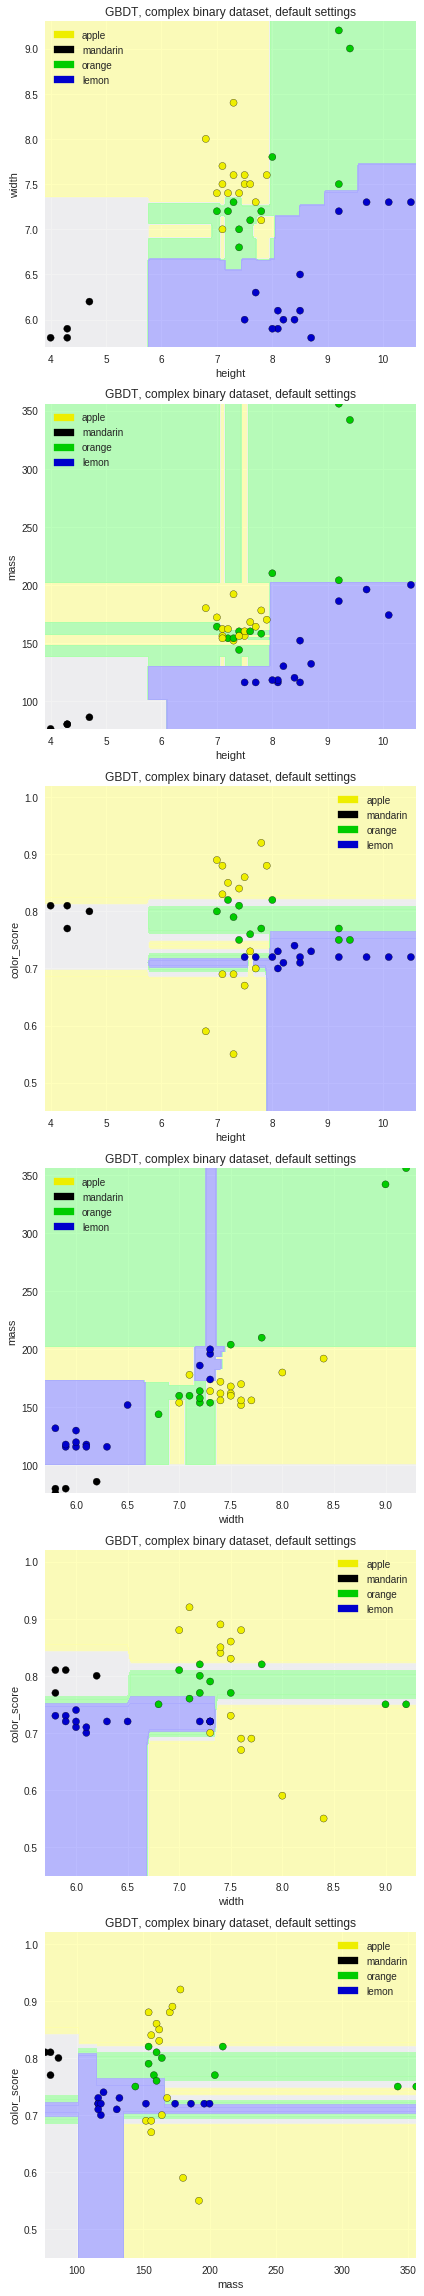

GBDT, Fruit dataset, default settings
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.80


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
                                                   y_fruits.as_matrix(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
for pair,this_axes in zip(pair_list,subaxes):
    X = X_train[:,pair]
    y = y_train
    clf = GradientBoostingClassifier()
    clf.fit(X,y)
    plot_class_regions_for_classifier_subplot(clf,X,y,None,None,title,this_axes,target_names_fruits)
    this_axes.set_xlabel(feature_names_fruits[pair[0]])
    this_axes.set_ylabel(feature_names_fruits[pair[1]])
plt.tight_layout()
plt.show()
clf = GradientBoostingClassifier().fit(X_train, y_train)

print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))